In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/lstm-gan_stats/gen_stats", "r") as f:
    lstm_results = json.loads(f.read())
# with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/model_best/gen_stats", "r") as f:
#     model = json.loads(f.read())
# with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/model_best/gen_clamped_stats", "r") as f:
#     model_clamped = json.loads(f.read())
with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/lstm-gan_stats/ref_stats", "r") as f:
    reference = json.loads(f.read())

model_dirs = ["/home/max/Documents/Univ/Lyrics2Melody/runs/data_aug_0.9_all_tones",
              "/home/max/Documents/Univ/Lyrics2Melody/runs/SlidingWindow_only_2024-04-25_15-43-53",
              "/home/max/Documents/Univ/Lyrics2Melody/runs/SlidingWindow_Shift0.2_2024-04-25_19-17-02",
              "/home/max/Documents/Univ/Lyrics2Melody/runs/SlidingWindow_Shift0.8_2024-04-25_17-22-42",
              "/home/max/Documents/Univ/Lyrics2Melody/runs/Without_Aug_2024-04-25_14-39-15"]
model_names = ["RNN-aug-0.9",
               "RNN-SW",
               "RNN-SW+0.2Shift",
               "RNN-SW+0.8Shift",
               "RNN-noaug"]

#Blue for reference
ref_color="xkcd:azure"
#Green for LSTM-GAN
LSTM_color = "yellowgreen"
#Orange for us
res_color = "orange"

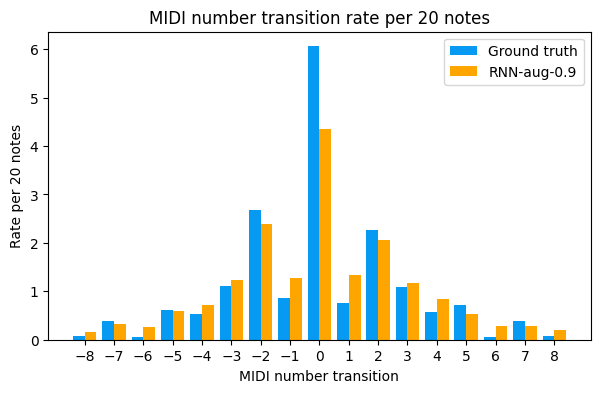

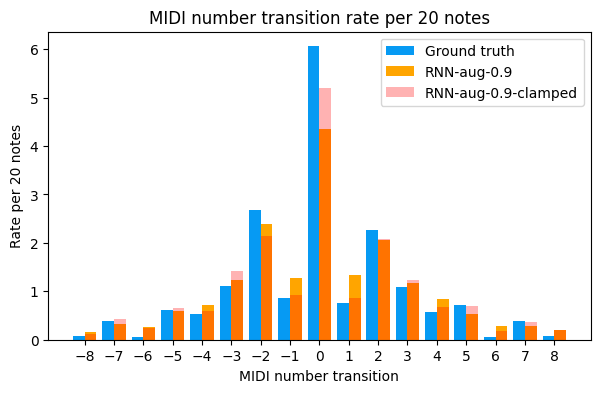

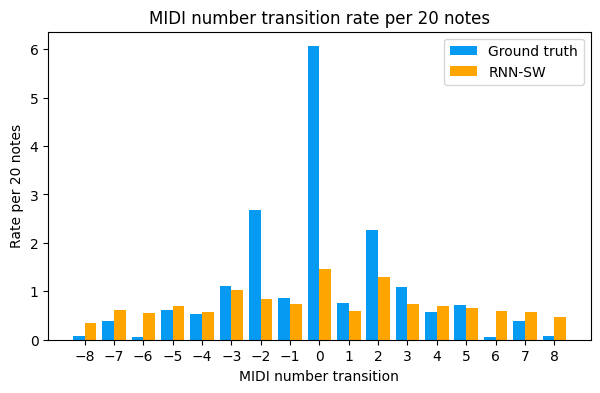

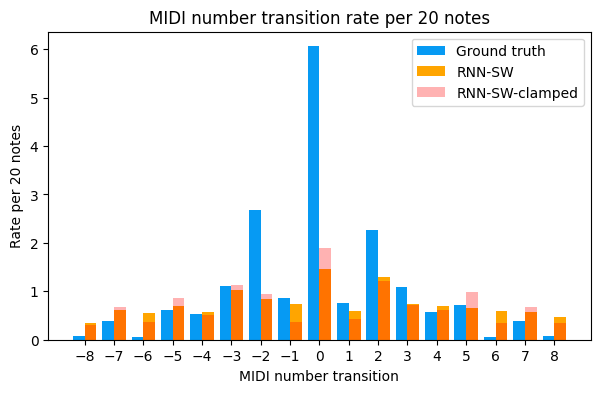

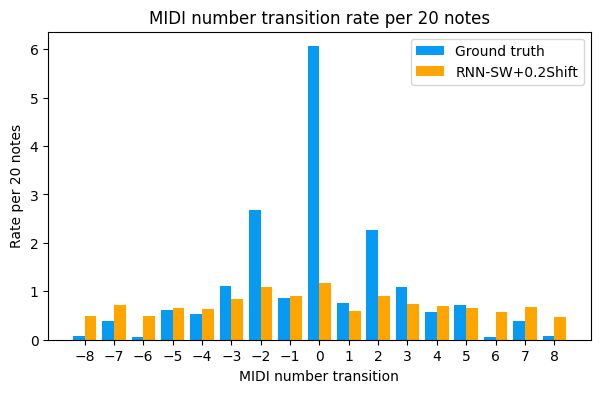

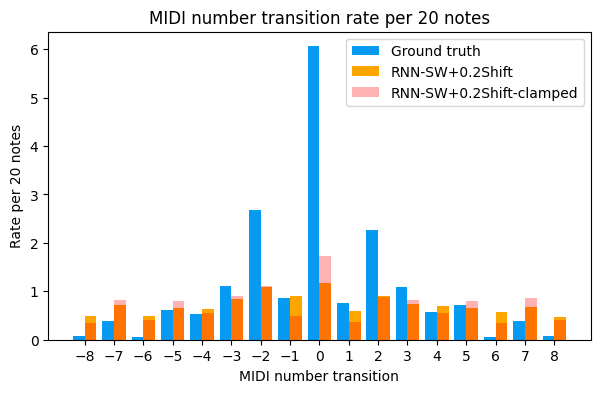

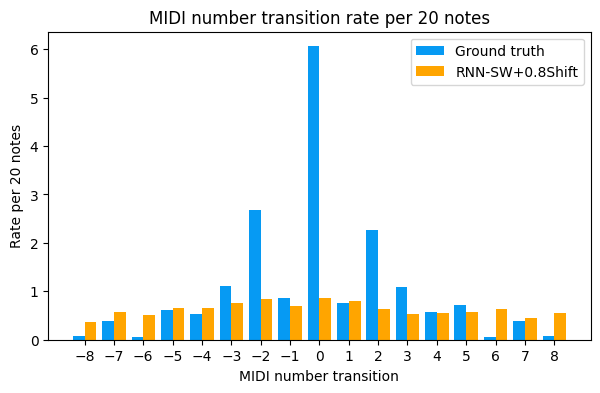

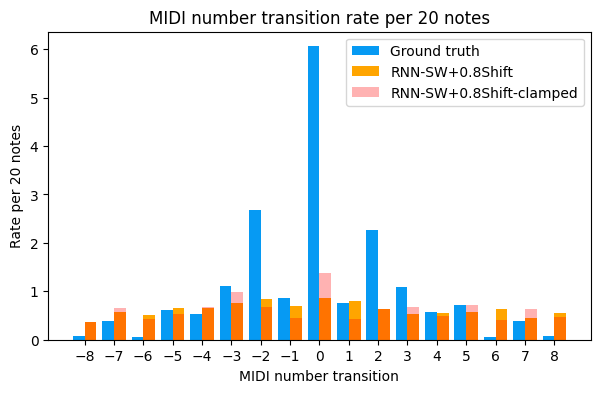

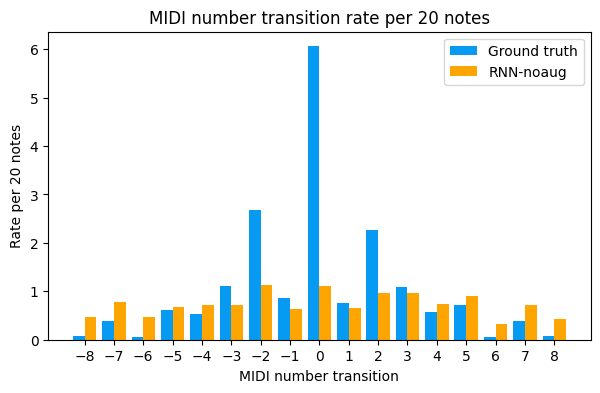

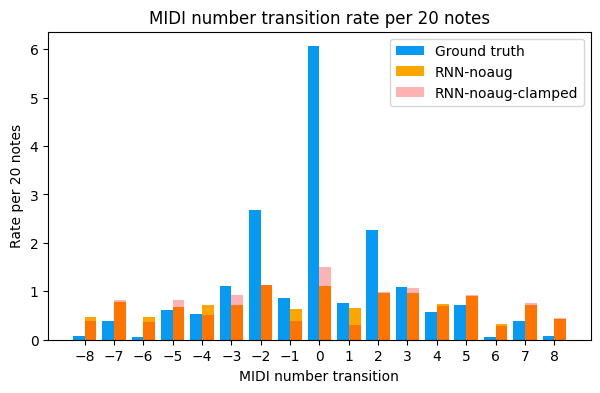

In [2]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(-8,9)
    barWidth = 0.4
    plt.figure(figsize=(7,4))
    plt.bar([x - barWidth/2 for x in xrange], [reference["transitions"][str(float(i))] if str(float(i)) in reference["transitions"] else 0 for i in xrange], barWidth, label="Ground truth", color=ref_color)
    plt.ylabel("Rate per 20 notes")
    plt.xlabel("MIDI number transition")
    plt.bar([x + barWidth/2 for x in xrange], [model["transitions"][str(float(i))] if str(float(i)) in lstm_results["transitions"] else 0 for i in xrange], barWidth, label=model_name, color=res_color)
    plt.title("MIDI number transition rate per 20 notes")
    plt.xticks(xrange)
    plt.legend()
    plt.show()

    xrange = range(-8,9)
    barWidth = 0.4
    plt.figure(figsize=(7,4))
    plt.bar([x - barWidth/2 for x in xrange], [reference["transitions"][str(float(i))] if str(float(i)) in reference["transitions"] else 0 for i in xrange], barWidth, label="Ground truth", color=ref_color)
    plt.ylabel("Rate per 20 notes")
    plt.xlabel("MIDI number transition")
    plt.bar([x + barWidth/2 for x in xrange], [model["transitions"][str(float(i))] if str(float(i)) in lstm_results["transitions"] else 0 for i in xrange], barWidth, label=model_name, color=res_color)
    plt.bar([x + barWidth/2 for x in xrange], [model_clamped["transitions"][str(float(i))] if str(float(i)) in lstm_results["transitions"] else 0 for i in xrange], barWidth, label=model_name+"-clamped", color="red", alpha=0.3)
    plt.title("MIDI number transition rate per 20 notes")
    plt.xticks(xrange)
    plt.legend()
    plt.show()

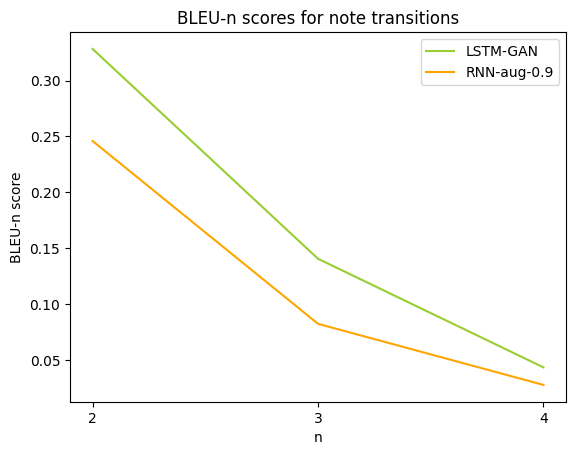

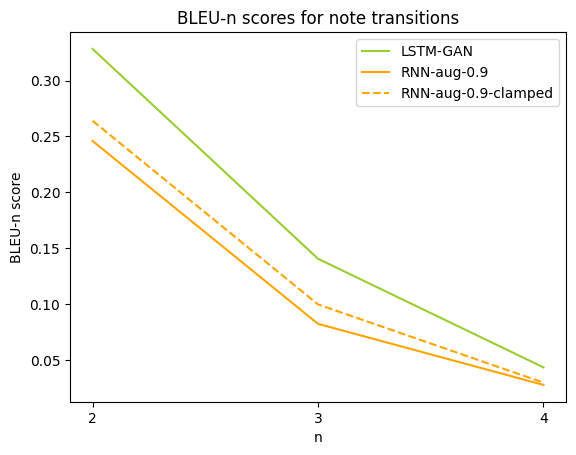

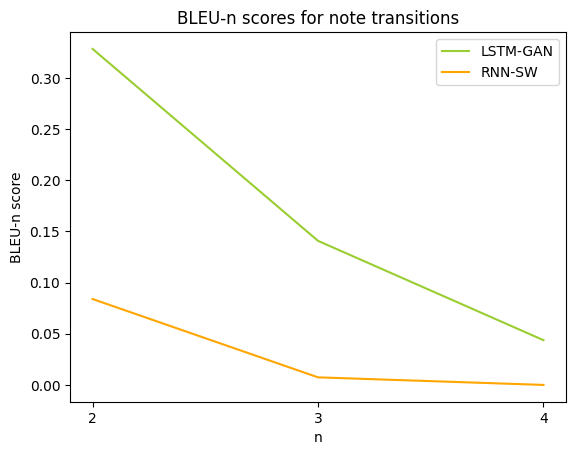

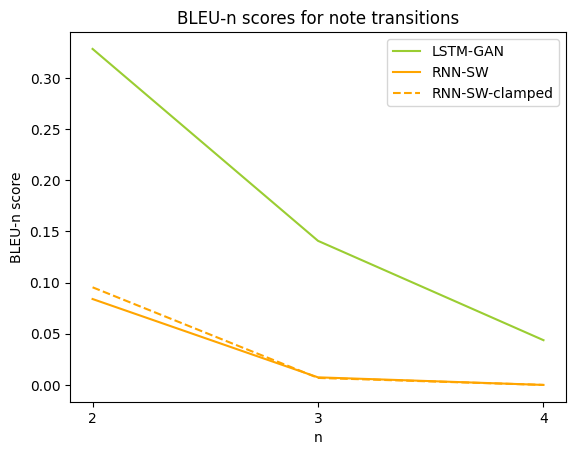

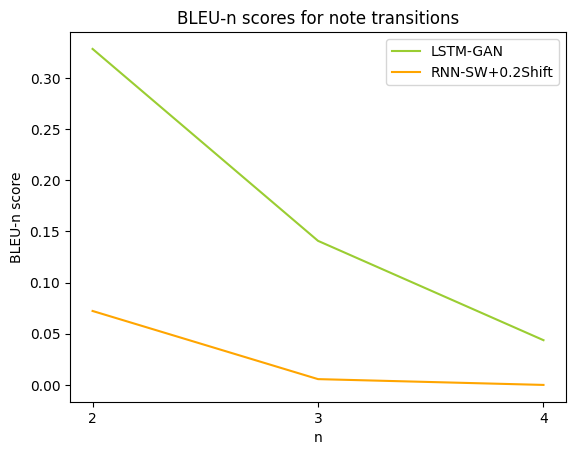

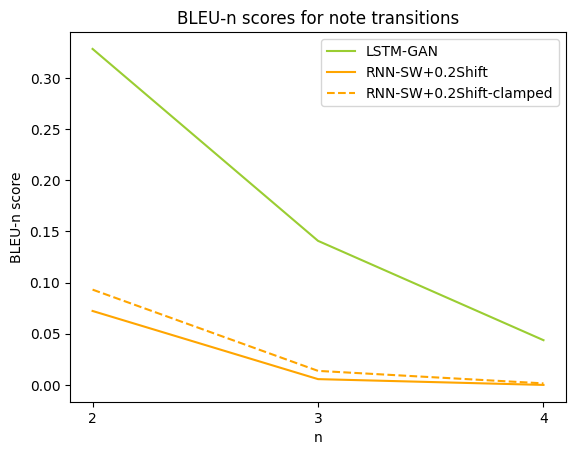

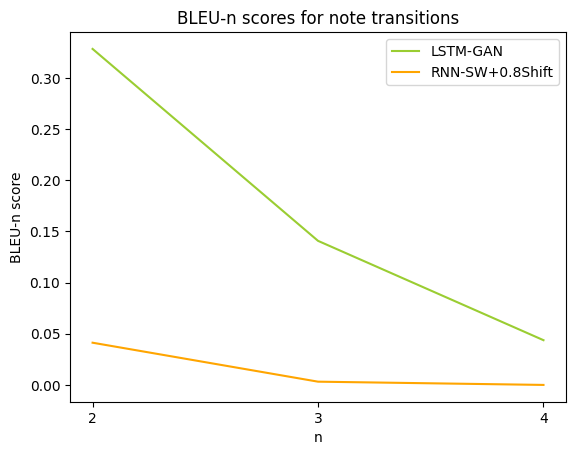

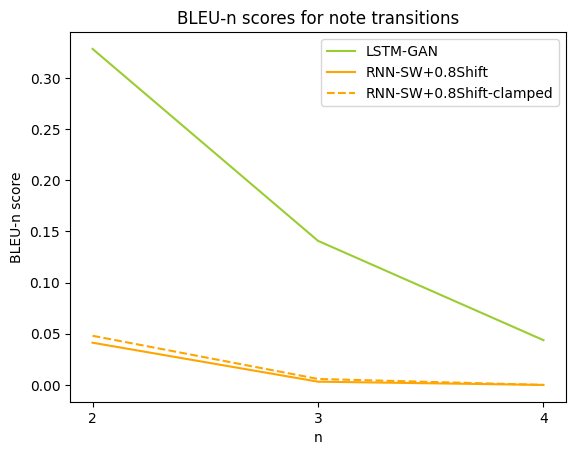

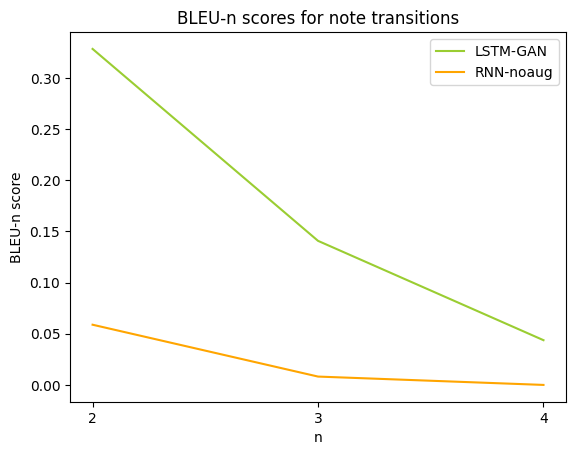

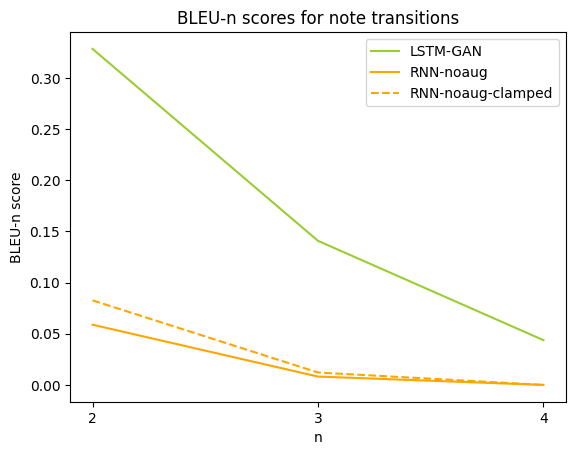

In [4]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(2,5)
    plt.plot(xrange, [lstm_results[f"bleu{i}_notes"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    plt.plot(xrange, [model[f"bleu{i}_notes"] for i in xrange], label=model_name, color=res_color)
    plt.xticks(xrange)
    plt.title("BLEU-n scores for note transitions")
    plt.ylabel("BLEU-n score")
    plt.xlabel("n")
    plt.legend()
    plt.show()

    xrange = range(2,5)
    plt.plot(xrange, [lstm_results[f"bleu{i}_notes"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    plt.plot(xrange, [model[f"bleu{i}_notes"] for i in xrange], label=model_name, color=res_color)
    plt.plot(xrange, [model_clamped[f"bleu{i}_notes"] for i in xrange], label=model_name+"-clamped", color=res_color, linestyle="--")
    plt.xticks(xrange)
    plt.title("BLEU-n scores for note transitions")
    plt.ylabel("BLEU-n score")
    plt.xlabel("n")
    plt.legend()
    plt.show()

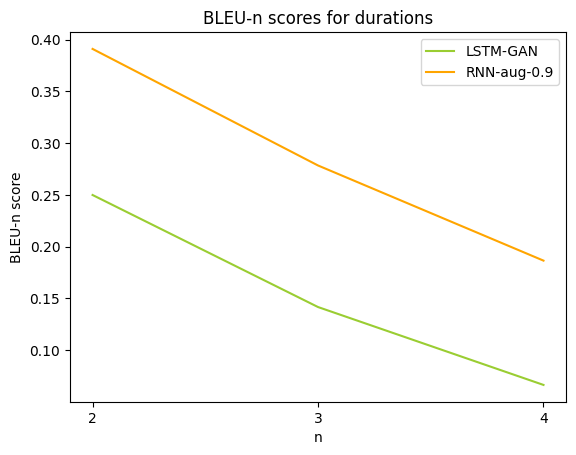

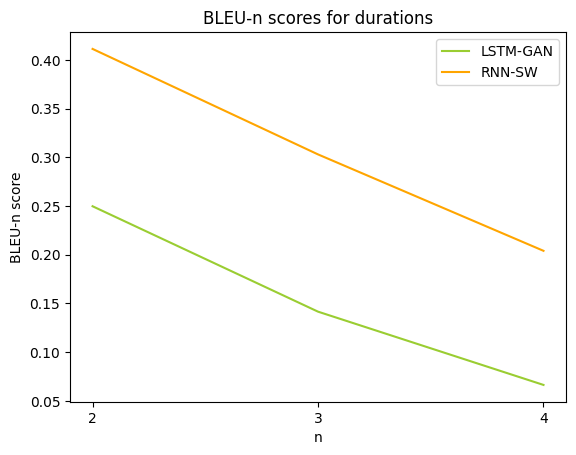

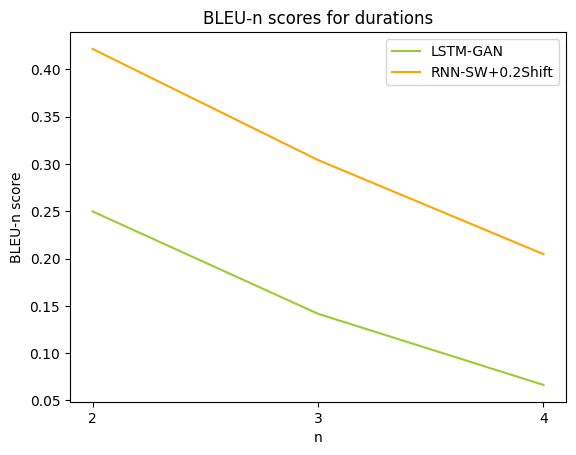

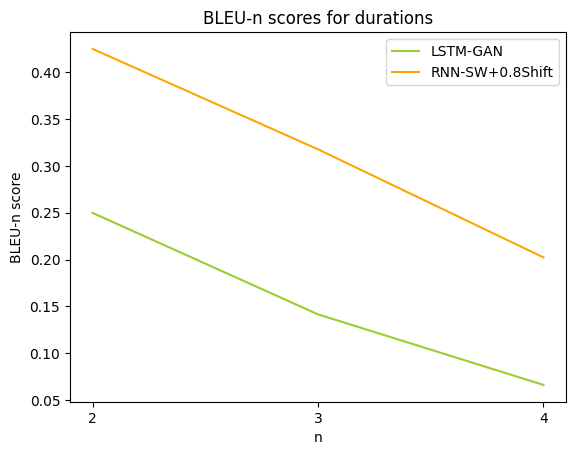

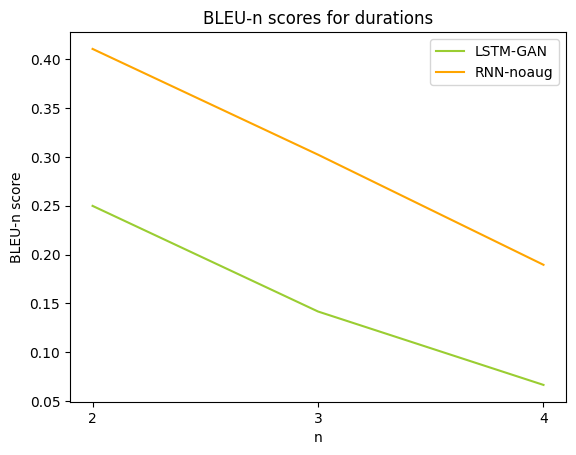

In [5]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(2,5)
    plt.plot(xrange, [lstm_results[f"bleu{i}_durations"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    plt.plot(xrange, [model[f"bleu{i}_durations"] for i in xrange], label=model_name, color=res_color)
    plt.xticks(xrange)
    plt.title("BLEU-n scores for durations")
    plt.ylabel("BLEU-n score")
    plt.xlabel("n")
    plt.legend()
    plt.show()

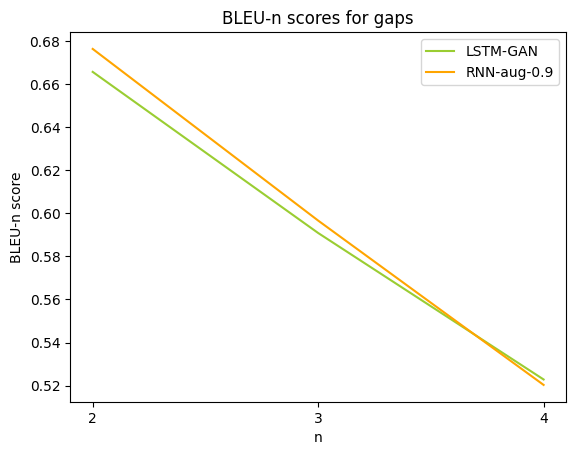

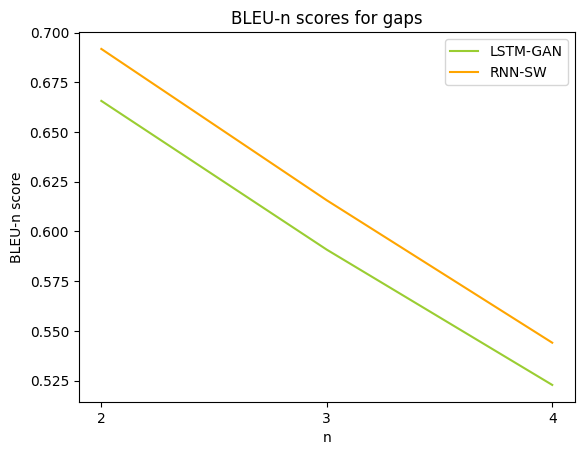

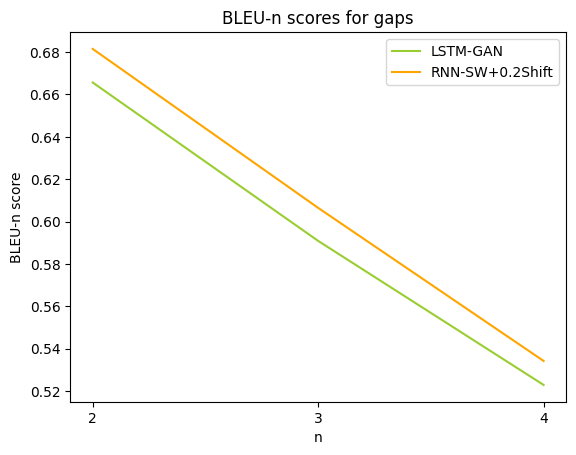

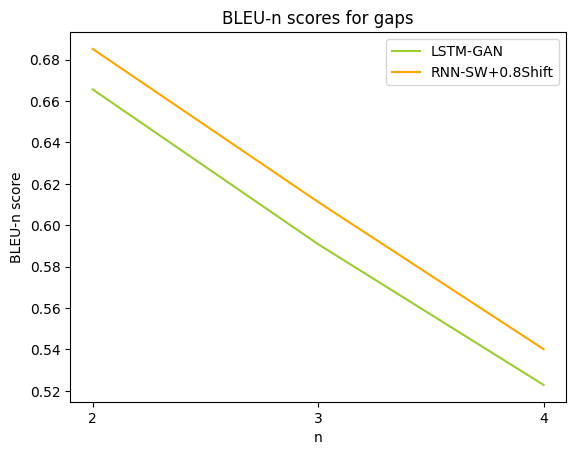

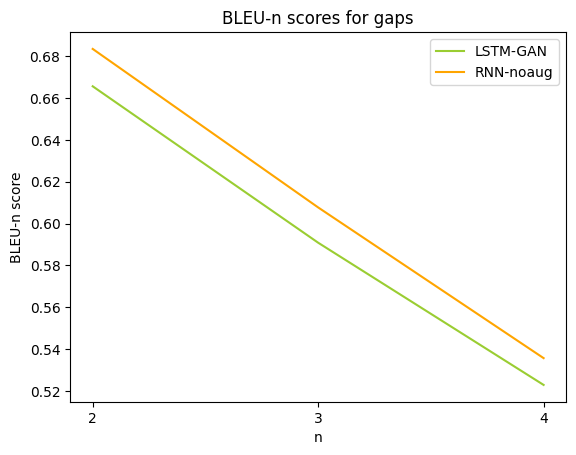

In [6]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(2,5)
    plt.plot(xrange, [lstm_results[f"bleu{i}_gaps"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    plt.plot(xrange, [model[f"bleu{i}_gaps"] for i in xrange], label=model_name, color=res_color)
    plt.xticks(xrange)
    plt.title("BLEU-n scores for gaps")
    plt.ylabel("BLEU-n score")
    plt.xlabel("n")
    plt.legend()
    plt.show()

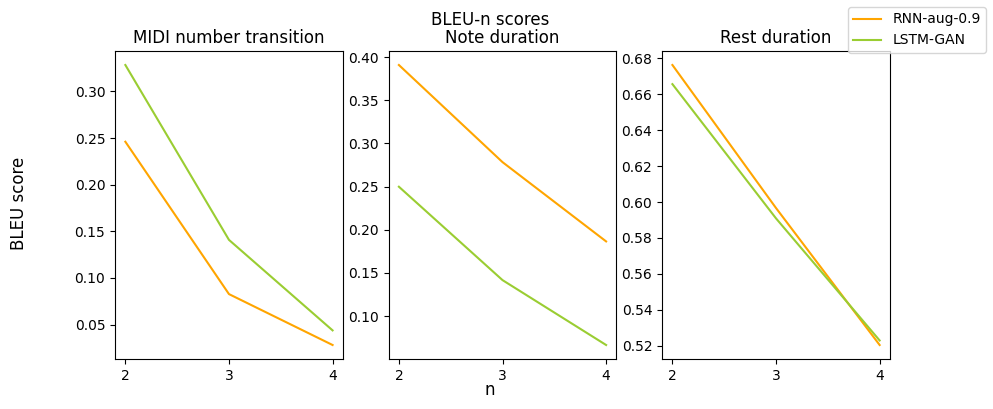

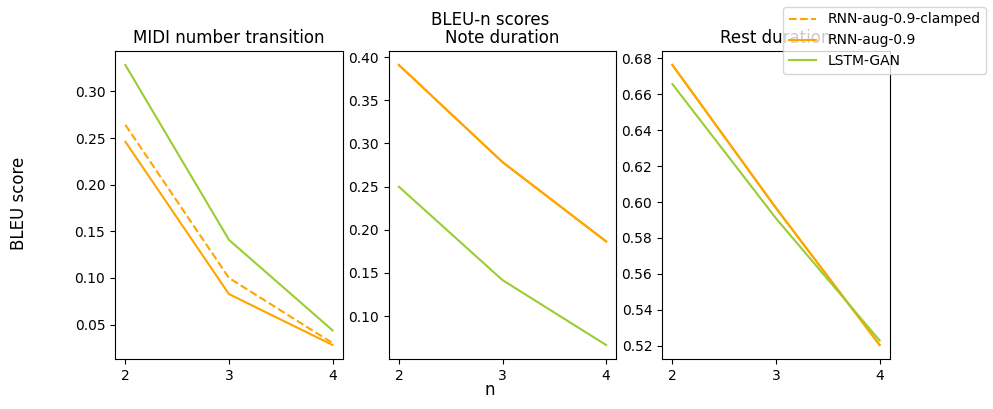

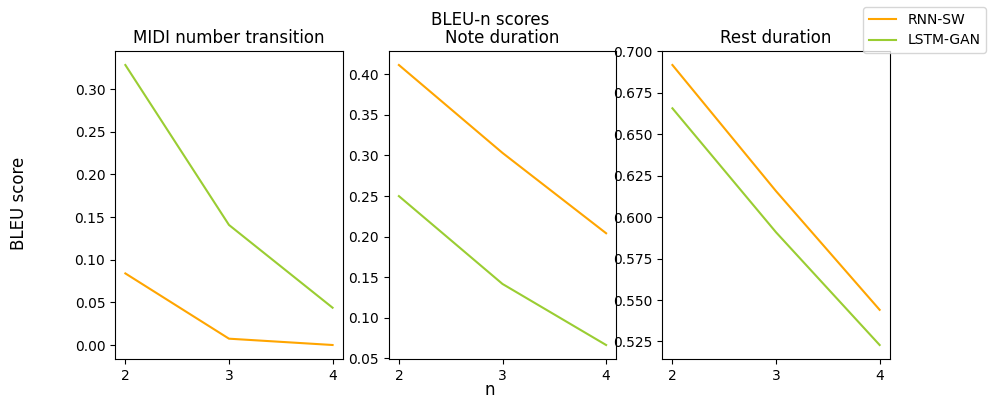

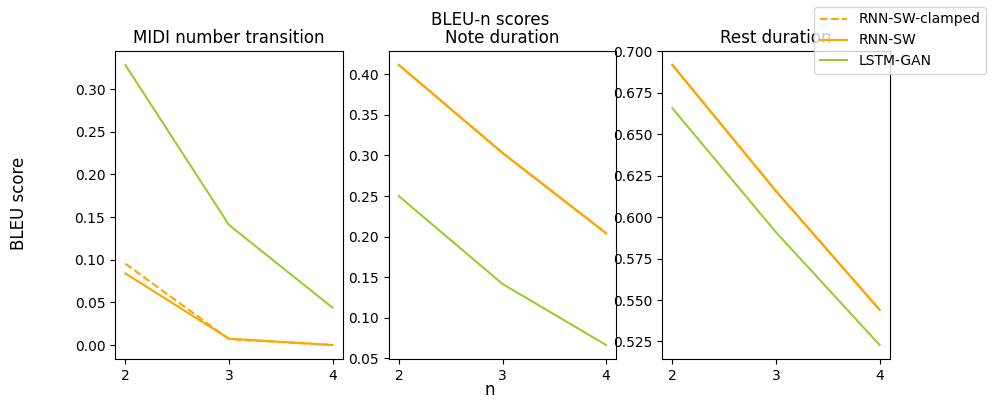

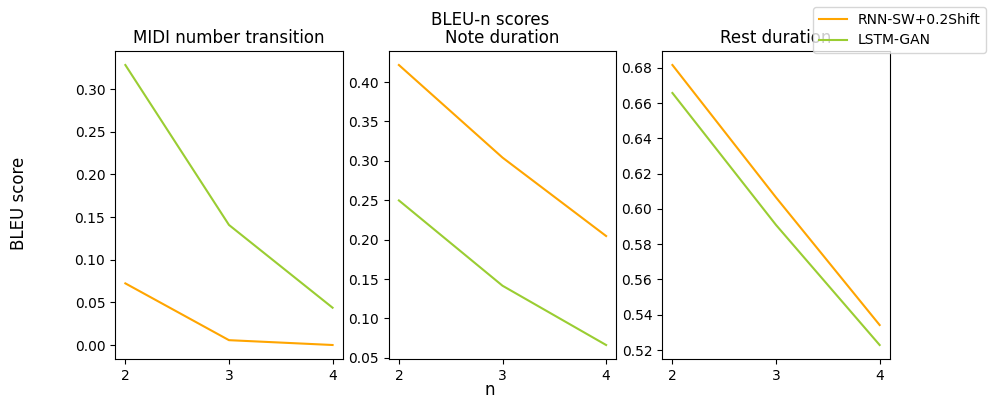

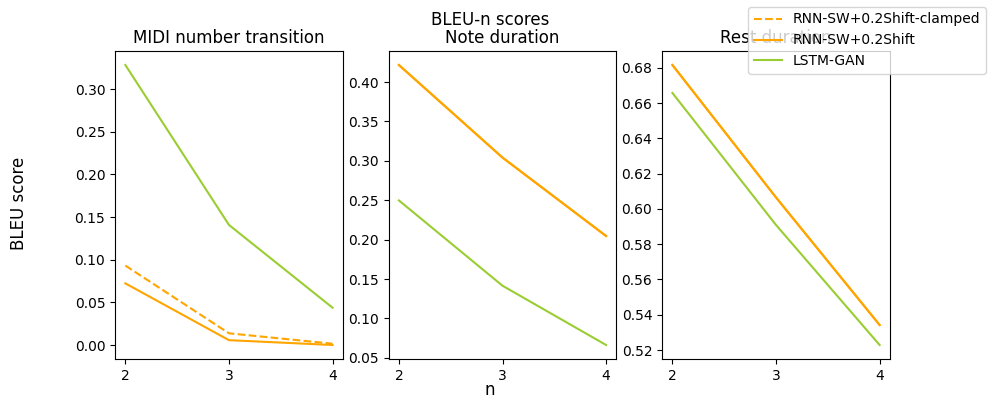

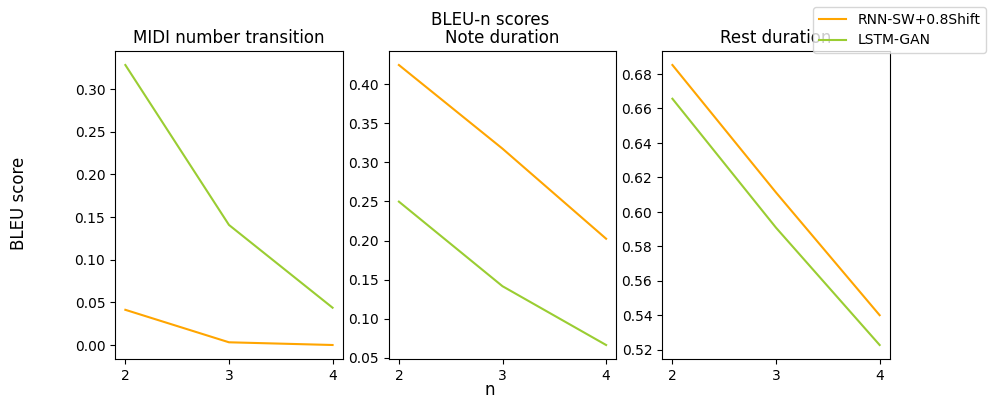

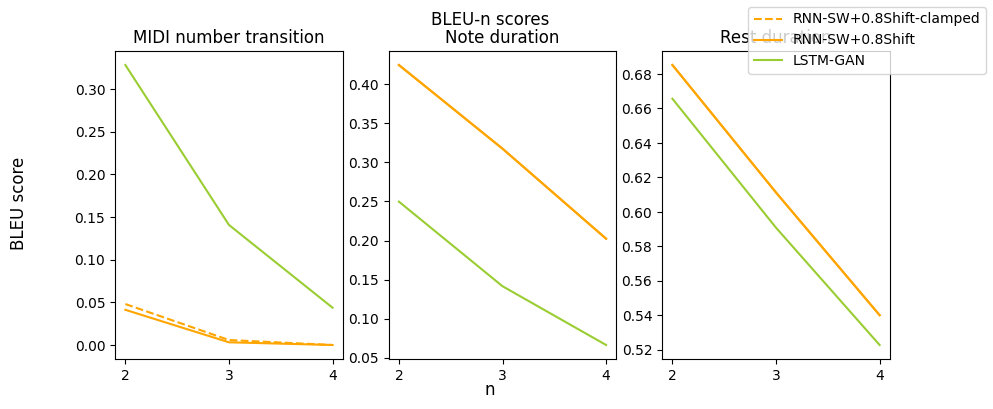

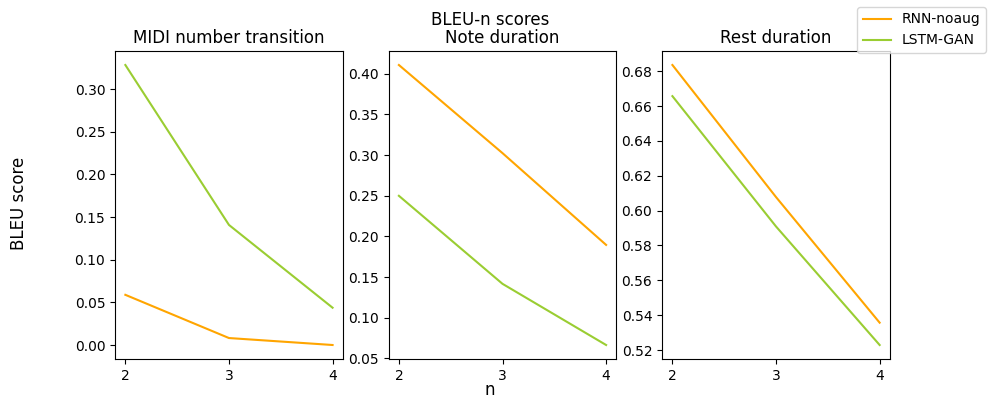

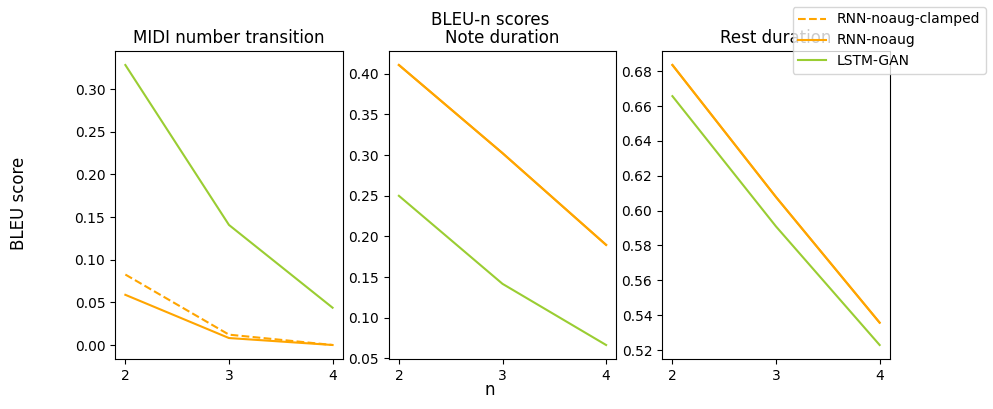

In [7]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(2,5)
    fig, axs = plt.subplots(ncols=3, sharey=False)
    fig.suptitle("BLEU-n scores")
    # plt.figure(figsize=(10,4))
    axs[0].title.set_text("MIDI number transition")
    axs[1].title.set_text("Note duration")
    axs[2].title.set_text("Rest duration")

    # axs[0].plot(xrange, [reference[f"bleu{i}_notes"] for i in xrange], label="Ground truth", color=ref_color)
    # axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

    axs[0].plot(xrange, [model[f"bleu{i}_notes"] for i in xrange], label=model_name, color=res_color)
    axs[1].plot(xrange, [model[f"bleu{i}_durations"] for i in xrange], label=model_name, color=res_color)
    axs[2].plot(xrange, [model[f"bleu{i}_gaps"] for i in xrange], label=model_name, color=res_color)
    # axs[1].plot(xrange, [rnn_results[f"rep{i}_std"] for i in xrange], color=res_color)

    axs[0].plot(xrange, [lstm_results[f"bleu{i}_notes"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[1].plot(xrange, [lstm_results[f"bleu{i}_durations"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[2].plot(xrange, [lstm_results[f"bleu{i}_gaps"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    # axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=LSTM_color)

    plt.setp(axs, xticks=xrange)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.set_size_inches(10,4)
    fig.legend(handles, labels, loc="upper right")
    fig.supxlabel("n")
    fig.supylabel("BLEU score")

    plt.show()

    xrange = range(2,5)
    fig, axs = plt.subplots(ncols=3, sharey=False)
    fig.suptitle("BLEU-n scores")
    # plt.figure(figsize=(10,4))
    axs[0].title.set_text("MIDI number transition")
    axs[1].title.set_text("Note duration")
    axs[2].title.set_text("Rest duration")

    # axs[0].plot(xrange, [reference[f"bleu{i}_notes"] for i in xrange], label="Ground truth", color=ref_color)
    # axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

    axs[0].plot(xrange, [model_clamped[f"bleu{i}_notes"] for i in xrange], label=model_name+"-clamped", color=res_color, linestyle="--")
    axs[1].plot(xrange, [model_clamped[f"bleu{i}_durations"] for i in xrange], label=model_name, color=res_color)
    axs[2].plot(xrange, [model_clamped[f"bleu{i}_gaps"] for i in xrange], label=model_name, color=res_color)
    # axs[1].plot(xrange, [rnn_results[f"rep{i}_std"] for i in xrange], color=res_color)
    axs[0].plot(xrange, [model[f"bleu{i}_notes"] for i in xrange], label=model_name, color=res_color)
    axs[1].plot(xrange, [model[f"bleu{i}_durations"] for i in xrange], label=model_name, color=res_color)
    axs[2].plot(xrange, [model[f"bleu{i}_gaps"] for i in xrange], label=model_name, color=res_color)

    axs[0].plot(xrange, [lstm_results[f"bleu{i}_notes"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[1].plot(xrange, [lstm_results[f"bleu{i}_durations"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[2].plot(xrange, [lstm_results[f"bleu{i}_gaps"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    # axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=LSTM_color)

    plt.setp(axs, xticks=xrange)
    handles, labels = axs[0].get_legend_handles_labels()
    fig.set_size_inches(10,4)
    fig.legend(handles, labels, loc="upper right")
    fig.supxlabel("n")
    fig.supylabel("BLEU score")

    plt.show()

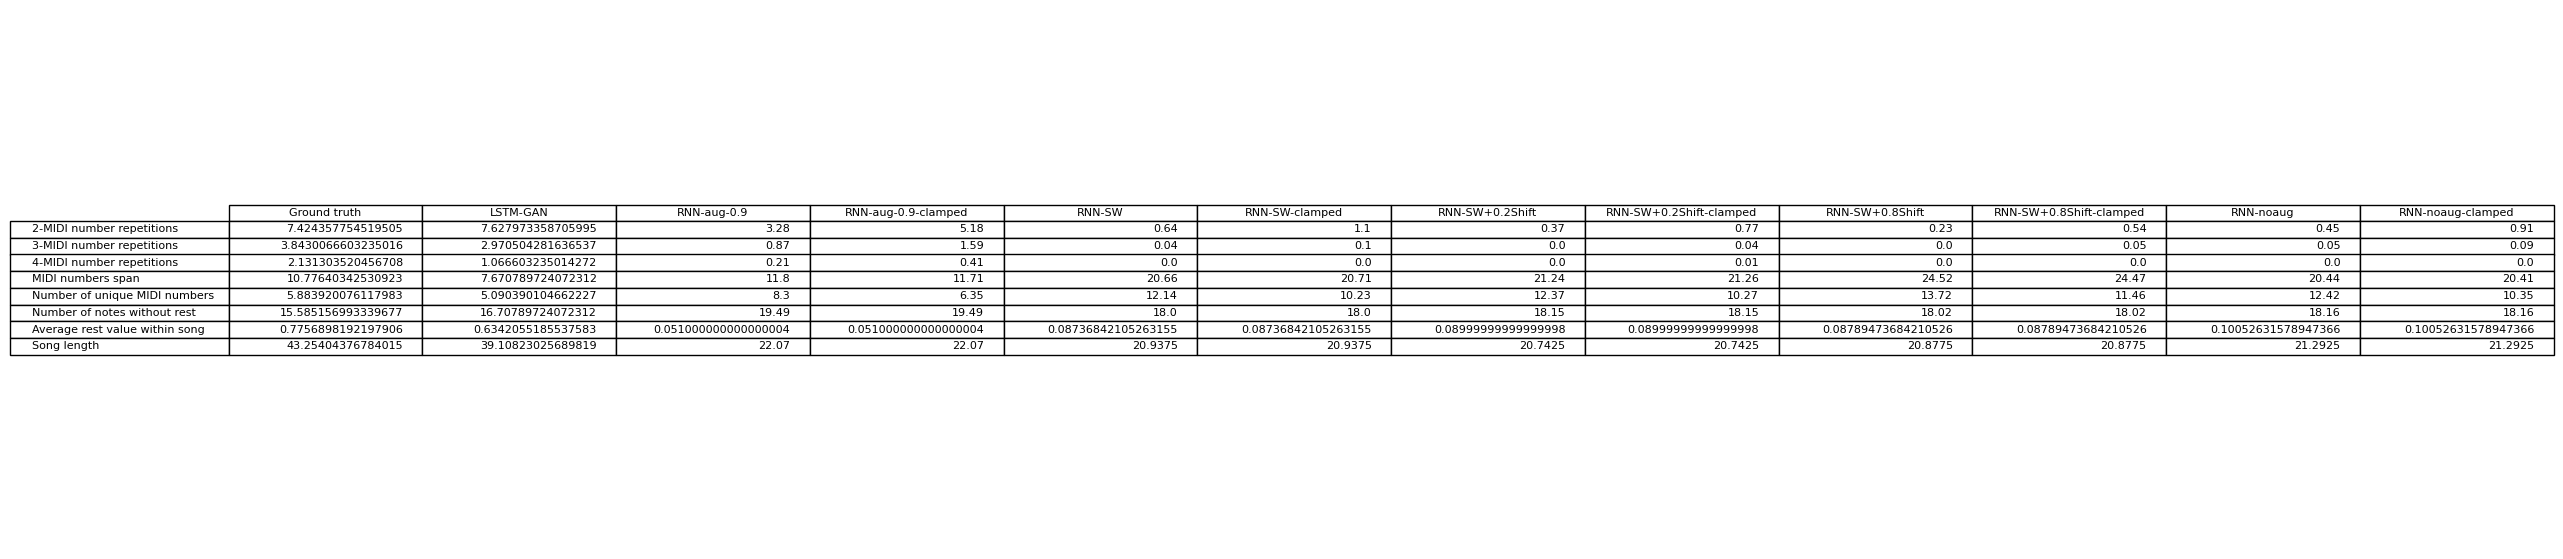

In [11]:
models = []
models_names = []
models.append(reference)
models_names.append("Ground truth")
models.append(lstm_results)
models_names.append("LSTM-GAN")
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        models.append(json.loads(f.read()))
        models_names.append(model_name)
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        models.append(json.loads(f.read()))
        models_names.append(model_name+"-clamped")


keys = ["rep2", "rep3", "rep4", "span", "unique","restless", "avg_rest", "song_len"]
# fig, ax = plt.subplots()
# plt.patch.set_visible(False)
plt.figure(figsize=(30,7))
plt.table(cellText=[[model[key] for model in models] for key in keys], colLabels=models_names, rowLabels=["2-MIDI number repetitions","3-MIDI number repetitions","4-MIDI number repetitions","MIDI numbers span", "Number of unique MIDI numbers", "Number of notes without rest", "Average rest value within song", "Song length"], loc="center")
# plt.table(cellText=[[reference[key], lstm_results[key], model[key]]for key in keys], colLabels=["Ground truth", "LSTM-GAN", "RNN"], rowLabels=["2-MIDI number repetitions","3-MIDI number repetitions","4-MIDI number repetitions","MIDI numbers span", "Number of unique MIDI numbers", "Number of notes without rest", "Average rest value within song", "Song length"], loc="center")
plt.axis('off')
# plt.axis('tight')
plt.axis()
# plt.tight_layout()
plt.show()

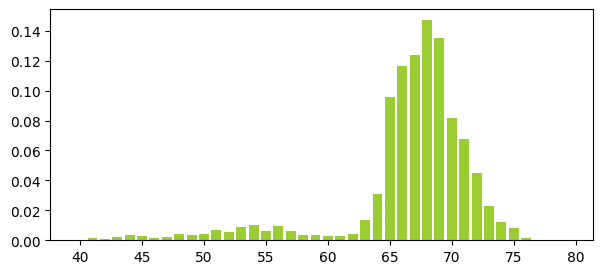

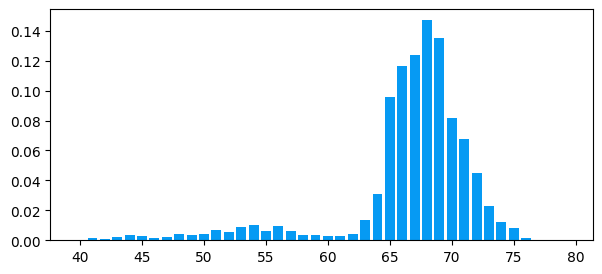

In [116]:
xrange = range(40, 80)
barWidth = 0.4
# plt.figure(figsize=(7,3))
# plt.bar([x - barWidth/2 for x in xrange], [reference["distribution_notes"][str(float(i))]/20 if str(float(i)) in reference["distribution_notes"] else 0 for i in xrange], width=barWidth, color=ref_color)
# plt.bar([x + barWidth/2 for x in xrange], [lstm_results["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=res_color)
# plt.show()

barWidth = 0.8
plt.figure(figsize=(7,3))
plt.bar(xrange, [lstm_results["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=LSTM_color)
plt.show()

plt.figure(figsize=(7,3))
plt.bar(xrange, [reference["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=ref_color)
plt.show()


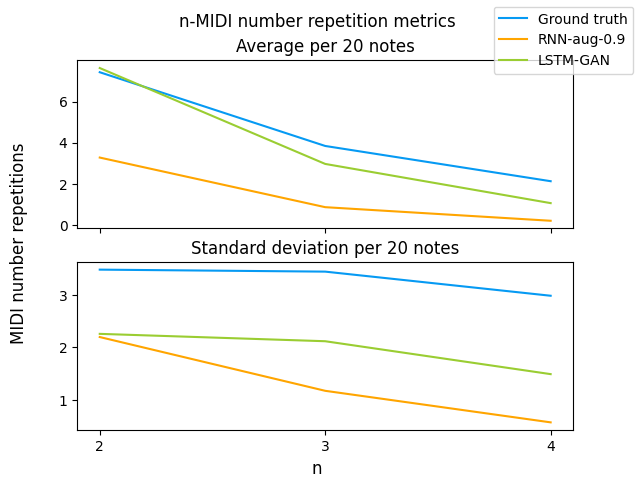

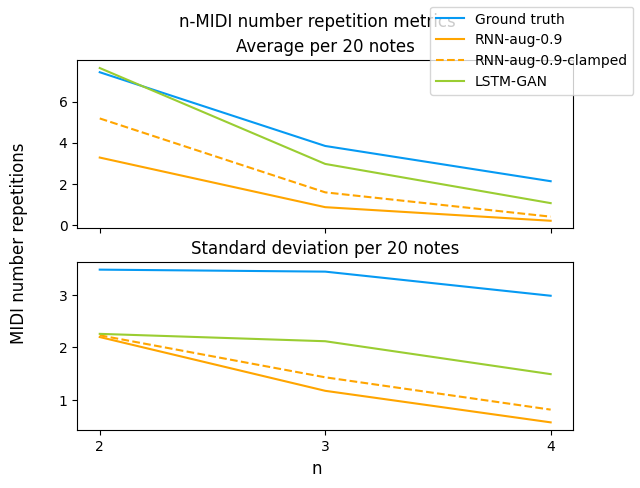

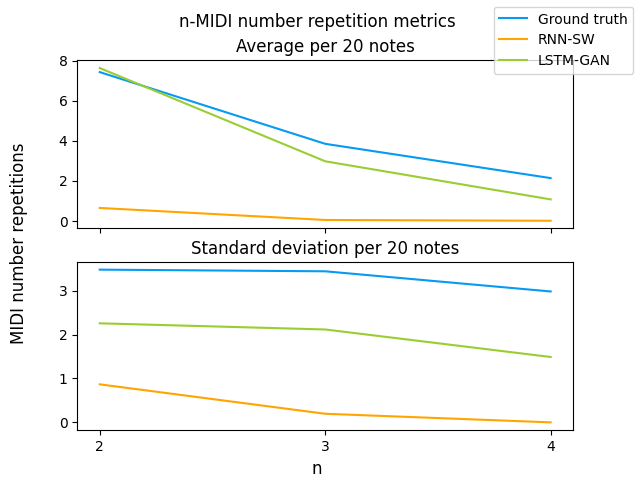

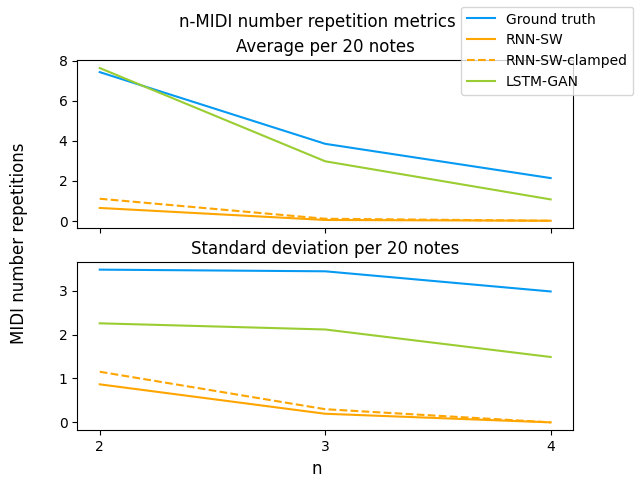

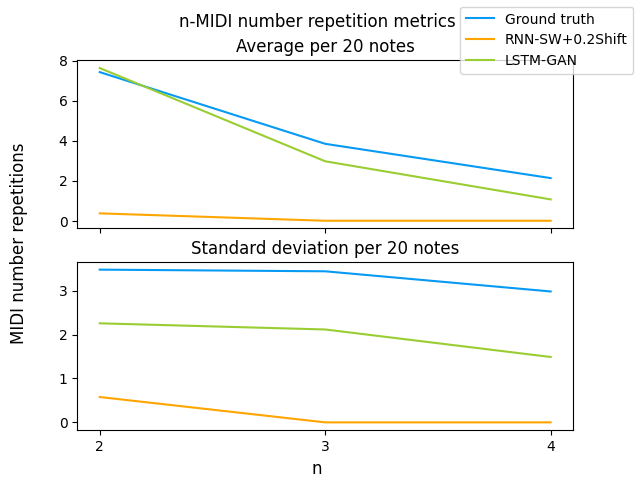

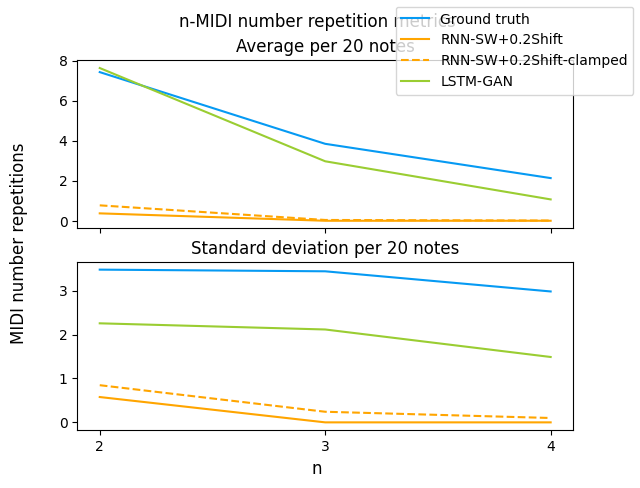

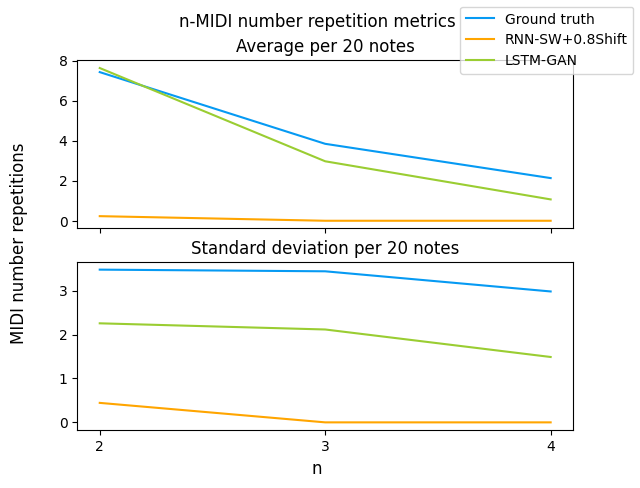

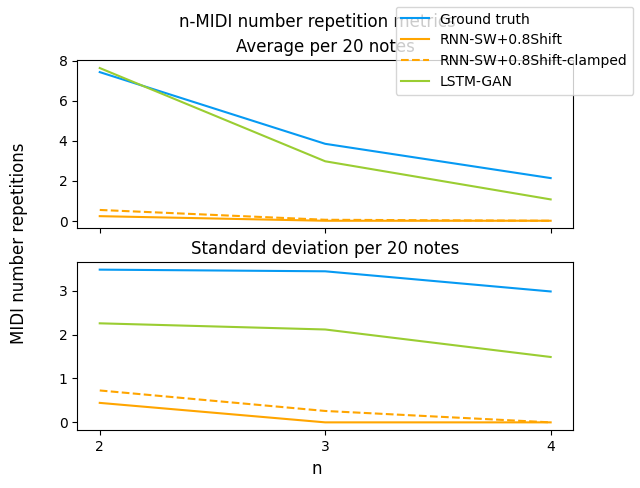

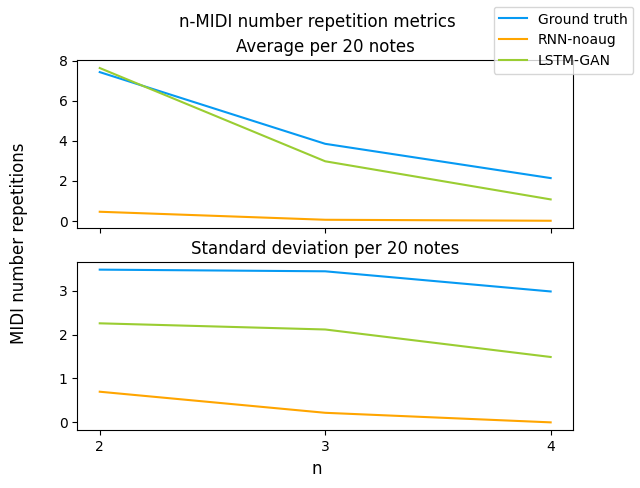

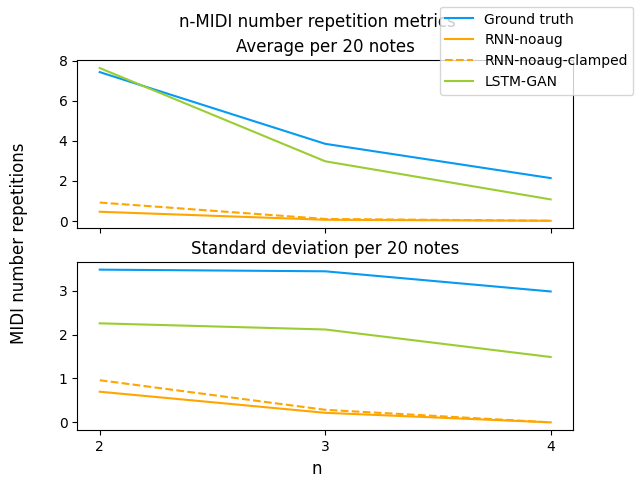

In [12]:
for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())
    
    xrange = range(2,5)
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle("n-MIDI number repetition metrics")
    axs[0].title.set_text("Average per 20 notes")
    axs[1].title.set_text("Standard deviation per 20 notes")

    axs[0].plot(xrange, [reference[f"rep{i}"] for i in xrange], label="Ground truth", color=ref_color)
    axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

    axs[0].plot(xrange, [model[f"rep{i}"] for i in xrange], label=model_name, color=res_color)
    axs[1].plot(xrange, [model[f"rep{i}_std"] for i in xrange], color=res_color)

    axs[0].plot(xrange, [lstm_results[f"rep{i}"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=LSTM_color)

    plt.setp(axs, xticks=xrange )
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    fig.supxlabel("n")
    fig.supylabel("MIDI number repetitions")

    plt.show()

    xrange = range(2,5)
    fig, axs = plt.subplots(2, sharex=True)
    fig.suptitle("n-MIDI number repetition metrics")
    axs[0].title.set_text("Average per 20 notes")
    axs[1].title.set_text("Standard deviation per 20 notes")

    axs[0].plot(xrange, [reference[f"rep{i}"] for i in xrange], label="Ground truth", color=ref_color)
    axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

    axs[0].plot(xrange, [model[f"rep{i}"] for i in xrange], label=model_name, color=res_color)
    axs[1].plot(xrange, [model[f"rep{i}_std"] for i in xrange], color=res_color)

    axs[0].plot(xrange, [model_clamped[f"rep{i}"] for i in xrange], label=model_name+"-clamped", color=res_color, linestyle="--")
    axs[1].plot(xrange, [model_clamped[f"rep{i}_std"] for i in xrange], color=res_color, linestyle="--")

    axs[0].plot(xrange, [lstm_results[f"rep{i}"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
    axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=LSTM_color)

    plt.setp(axs, xticks=xrange )
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper right")
    fig.supxlabel("n")
    fig.supylabel("MIDI number repetitions")

    plt.show()

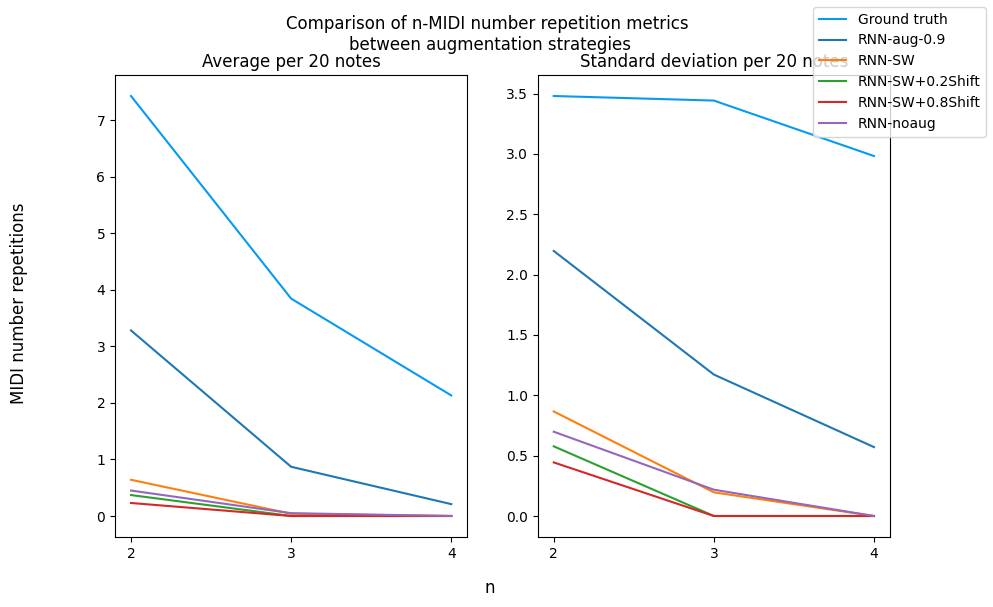

In [29]:
xrange = range(2,5)
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
fig.suptitle("Comparison of n-MIDI number repetition metrics \nbetween augmentation strategies")
axs[0].title.set_text("Average per 20 notes")
axs[1].title.set_text("Standard deviation per 20 notes")

axs[0].plot(xrange, [reference[f"rep{i}"] for i in xrange], label="Ground truth", color=ref_color)
axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())

    axs[0].plot(xrange, [model[f"rep{i}"] for i in xrange], label=model_name)
    axs[1].plot(xrange, [model[f"rep{i}_std"] for i in xrange])

    # axs[0].plot(xrange, [model_clamped[f"rep{i}"] for i in xrange], label=model_name+"-clamped", linestyle="--")
    # axs[1].plot(xrange, [model_clamped[f"rep{i}_std"] for i in xrange], linestyle="--")

plt.setp(axs, xticks=xrange )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.supxlabel("n")
fig.supylabel("MIDI number repetitions")

plt.show()

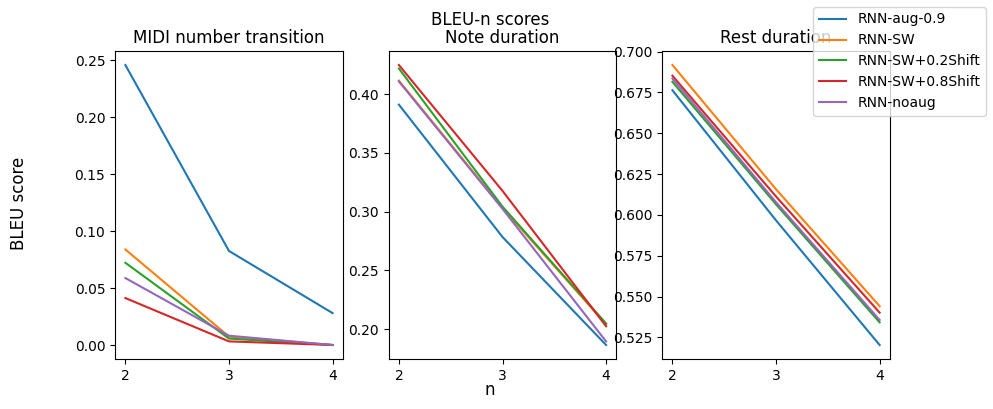

In [22]:
xrange = range(2,5)
fig, axs = plt.subplots(ncols=3, sharey=False)
fig.suptitle("Comparison of BLEU-n scores between augmentation strategies")
axs[0].title.set_text("MIDI number transition")
axs[1].title.set_text("Note duration")
axs[2].title.set_text("Rest duration")

for model_dir, model_name in zip(model_dirs, model_names):
    with open(model_dir + "/stats/gen_stats", "r") as f:
        model = json.loads(f.read())
    with open(model_dir + "/stats/gen_clamped_stats", "r") as f:
        model_clamped = json.loads(f.read())

    # axs[0].plot(xrange, [reference[f"bleu{i}_notes"] for i in xrange], label="Ground truth", color=ref_color)
    # axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

    axs[0].plot(xrange, [model[f"bleu{i}_notes"] for i in xrange], label=model_name)
    axs[1].plot(xrange, [model[f"bleu{i}_durations"] for i in xrange], label=model_name)
    axs[2].plot(xrange, [model[f"bleu{i}_gaps"] for i in xrange], label=model_name)
    # axs[1].plot(xrange, [rnn_results[f"rep{i}_std"] for i in xrange], color=res_color)

plt.setp(axs, xticks=xrange)
handles, labels = axs[0].get_legend_handles_labels()
fig.set_size_inches(10,4)
fig.legend(handles, labels, loc="upper right")
fig.supxlabel("n")
fig.supylabel("BLEU score")
plt.show()